 # **Importing Models**

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from keras.preprocessing import image
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report,confusion_matrix
import cv2 as cv

In [80]:
def load_dataset(container_path):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            img = imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img_pred = image.img_to_array(img)
            img_pred = img_pred / 255
            train_img.append(img_pred)
    X = np.array(train_img)
    print("count: "+ str(count))
    return X

X = []
X = load_dataset(r"C:\Users\karth\Sunayana\Machine Learning\Diabetic Retinopathy\data\CNN\colored_images")

y0 = np.zeros(6106)
y1 = np.ones(9316)
y = []
y = np.concatenate((y0,y1), axis=0)
y = []
y = np.concatenate((y0,y1), axis=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
print("x_train: "+str(x_train.shape))
print("x_test: "+str(x_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

count: 15422
x_train: (12337, 224, 224, 1)
x_test: (3085, 224, 224, 1)
y_train: (12337, 2)
y_test: (3085, 2)


# Modeling

In [84]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(34, (3, 3), input_shape=(224, 224, 1), activation='relu', kernel_initializer='he_uniform'))
# Batch Normalization LAYER
model.add(BatchNormalization())
# POOLING LAYER
model.add(MaxPooling2D((2, 2)))
# DENSE HIDDEN LAYER 
model.add(Dense(84, activation='relu', kernel_initializer='he_uniform'))
# POOLING LAYER
model.add(MaxPooling2D((4, 4)))
#  DENSE HIDDEN LAYER 
model.add(Dense(160, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(190, activation='relu', kernel_initializer='he_uniform'))
# POOLING LAYER
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES

model.add(Dense(2, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['mae', 'accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 222, 222, 34)      340       
                                                                 
 batch_normalization_13 (Bat  (None, 222, 222, 34)     136       
 chNormalization)                                                
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 111, 111, 34)     0         
 g2D)                                                            
                                                                 
 dense_76 (Dense)            (None, 111, 111, 84)      2940      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 27, 27, 84)       0         
 g2D)                                                            
                                                     

In [85]:
model.fit(x_train, y_train, batch_size=5, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
2468/2468 [==============================] - 539s 216ms/step - loss: 0.7120 - mae: 0.4779 - accuracy: 0.6040 - val_loss: 0.6790 - val_mae: 0.4687 - val_accuracy: 0.6010
Epoch 2/3
2468/2468 [==============================] - 497s 202ms/step - loss: 0.6731 - mae: 0.4775 - accuracy: 0.6048 - val_loss: 0.6740 - val_mae: 0.4848 - val_accuracy: 0.6010
Epoch 3/3
2468/2468 [==============================] - 294s 119ms/step - loss: 0.6729 - mae: 0.4777 - accuracy: 0.6048 - val_loss: 0.6741 - val_mae: 0.4850 - val_accuracy: 0.6010


# Evaluation

In [86]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,mae,accuracy,val_loss,val_mae,val_accuracy
0,0.712014,0.477864,0.603956,0.678976,0.468661,0.600972
1,0.673101,0.477490,0.604847,0.673989,0.484846,0.600972
2,0.672933,0.477743,0.604847,0.674113,0.485041,0.600972


<AxesSubplot:>

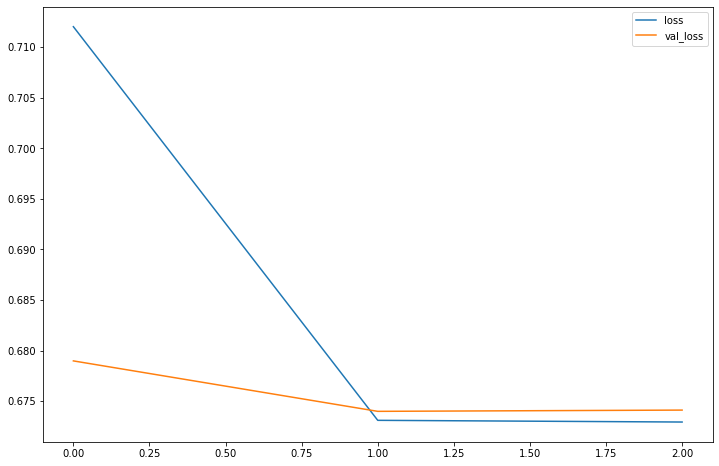

In [87]:
losses[['loss','val_loss']].plot(figsize=(12,8))


<AxesSubplot:>

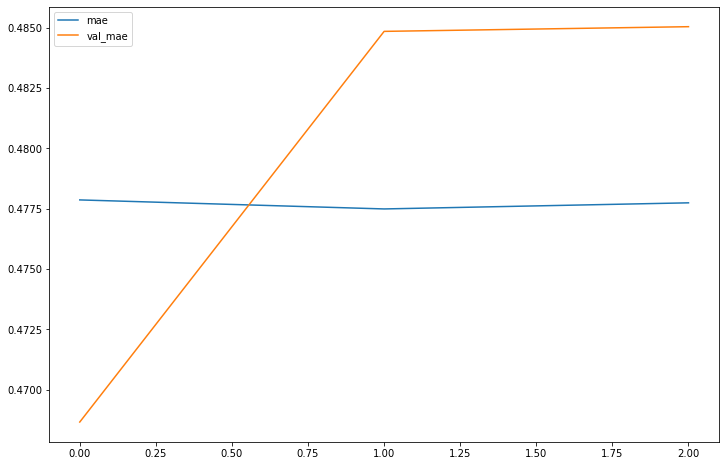

In [88]:
losses[['mae','val_mae']].plot(figsize=(12,8))

In [90]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[[0.42586106 0.5741389 ]
 [0.42586106 0.5741389 ]
 [0.42586106 0.5741389 ]
 ...
 [0.42586106 0.5741389 ]
 [0.42586106 0.5741389 ]
 [0.42586106 0.5741389 ]]
The actual data is:
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets